In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image
from IPython.display import display
import cv2
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from skimage import io

## Default image

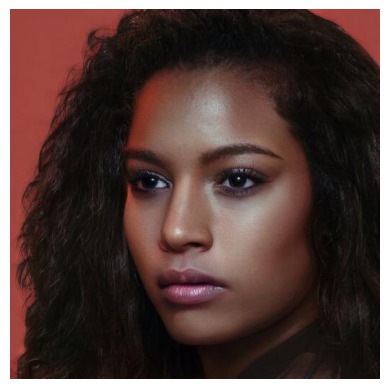

In [2]:
image_path = 'cropped.jpg'

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# K-Means algorithm

In [3]:
# implement the k-means function return the labels and centers
def k_means(X, n_clusters, max_iters=100):
    # randomly initialize centroids
    centers = X[np.random.choice(len(X), n_clusters, replace=False)]

    for _ in range(max_iters):
        # assign each data point to the closest centroid
        labels = pairwise_distances_argmin(X, centers)

        # update centroids based on the mean of points assigned to each cluster
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return labels, centers

# Default seed, blob

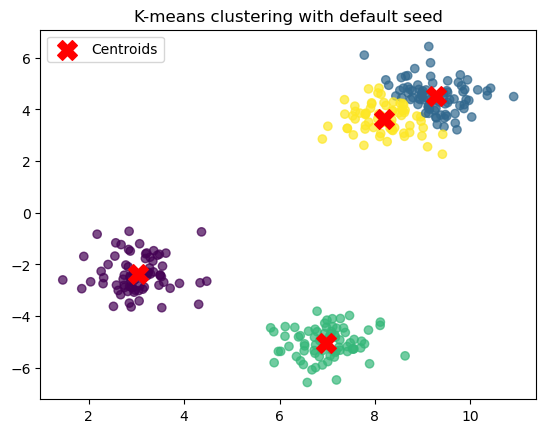

In [4]:
# default seed
np.random.seed()

# from extras document
# set the total number of instances to be 300
# number of centers is 4 with the standard deviation 0.6
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6)

# fit model
labels, centers = k_means(X, n_clusters=4)

# plot the generated data with labels by using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means clustering with default seed')
plt.legend()
plt.show()

# Default seed, image compression

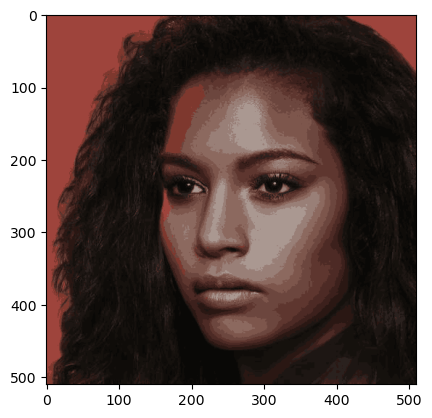

In [5]:
# default seed
np.random.seed()

def read_image():
    img = cv2.imread('cropped.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # scaling the image so that the values are in the range of 0 to 1
    img = img / 255.0

    return img

def compress_image(labels, centers, img, clusters):
    recovered = centers[labels]
    recovered = recovered.reshape(img.shape)
    plt.imshow(recovered)
    plt.show()
    cv2.imwrite('compressed_' + str(clusters) + '_colors.png', recovered)

if __name__ == '__main__':
    img = read_image()

    clusters = 16
    clusters = int(16)

    points = img.reshape((-1, img.shape[2]))
    labels, centers = k_means(points, n_clusters=clusters)
    compress_image(labels, centers, img, clusters)


# Seed=2, blob

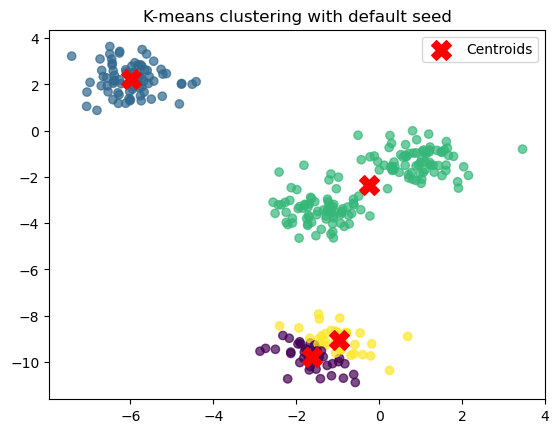

In [6]:
# default seed
np.random.seed(2)

# from extras document
# set the total number of instances to be 300
# number of centers is 4 with the standard deviation 0.6
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6)

# fit model
labels, centers = k_means(X, n_clusters=4)

# plot the generated data with labels by using matplotlib
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means clustering with default seed')
plt.legend()
plt.show()

# Seed=2, image compression

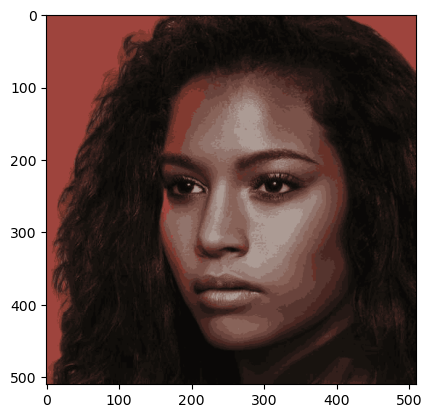

In [7]:
# default seed
np.random.seed(2)

def read_image():
    img = cv2.imread('cropped.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0

    return img

def compress_image(labels, centers, img, clusters):
    recovered = centers[labels]
    recovered = recovered.reshape(img.shape)
    plt.imshow(recovered)
    plt.show()
    cv2.imwrite('compressed_' + str(clusters) + '_colors.png', recovered)

if __name__ == '__main__':
    img = read_image()

    clusters = 16
    clusters = int(16)

    points = img.reshape((-1, img.shape[2]))
    labels, centers = k_means(points, n_clusters=clusters)
    compress_image(labels, centers, img, clusters)

# K-Means++ algorithm

In [8]:
def k_means_plus(X, n_clusters, max_iters=100):
    # initialize the first centroid randomly
    centers = [X[np.random.choice(len(X))]]

    # initialize the remaining centroids using k-means++
    for _ in range(1, n_clusters):
        # calculate the squared distances from each point to the nearest existing centroid
        distances = np.array([min([np.linalg.norm(x - c) ** 2 for c in centers]) for x in X])

        # calculate the probability distribution
        probabilities = distances / distances.sum()

        # choose the next centroid based on the probability distribution
        next_center = X[np.random.choice(len(X), p=probabilities)]
        centers.append(next_center)

    for _ in range(max_iters):
        # assign each data point to the closest centroid
        labels = pairwise_distances_argmin(X, centers)

        # update centroids based on the mean of points assigned to each cluster
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return labels, centers

# Default seed, blob

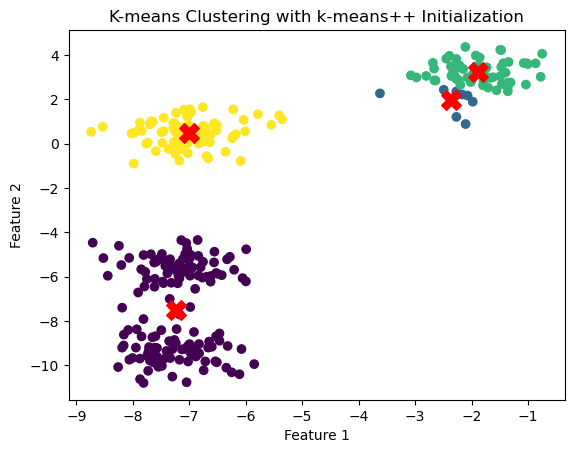

In [9]:
# seed=2
np.random.seed()

# from extras document
# set the total number of instances to be 300
# number of centers is 4 with the standard deviation 0.6
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6)

# kit the k-means model with k-means++ initialization
labels, centers = k_means_plus(X, n_clusters=4)

# plot the figure
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red')
plt.title('K-means Clustering with k-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Default seed, image compression

In [ ]:
# default seed
np.random.seed()

def read_image():
    img = cv2.imread('cropped.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0

    return img

def compress_image(labels, centers, img, clusters):
    recovered = centers[labels]
    recovered = recovered.reshape(img.shape)
    plt.imshow(recovered)
    plt.show()
    cv2.imwrite('compressed_' + str(clusters) + '_colors.png', recovered)

if __name__ == '__main__':
    img = read_image()

    clusters = 16
    clusters = int(16)

    points = img.reshape((-1, img.shape[2]))
    labels, centers = k_means_plus(points, n_clusters=clusters)
    compress_image(labels, centers, img, clusters)

# Seed=2, blob

In [ ]:
# seed=2
np.random.seed(2)

# from extras document
# set the total number of instances to be 300
# number of centers is 4 with the standard deviation 0.6
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6)

# kit the k-means model with k-means++ initialization
labels, centers = k_means_plus(X, n_clusters=4)

# plot the figure
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red')
plt.title('K-means Clustering with k-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Seed=2, image compression

In [ ]:
# default seed
np.random.seed(2)

def read_image():
    img = cv2.imread('cropped.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0

    return img

def compress_image(labels, centers, img, clusters):
    recovered = centers[labels]
    recovered = recovered.reshape(img.shape)
    plt.imshow(recovered)
    plt.show()

    cv2.imwrite('compressed_' + str(clusters) + '_colors.png', recovered)

if __name__ == '__main__':
    img = read_image()

    clusters = 16
    clusters = int(16)

    points = img.reshape((-1, img.shape[2]))
    labels, centers = k_means_plus(points, n_clusters=clusters)
    compress_image(labels, centers, img, clusters)

## Hierarchical clustering

In [ ]:
customer_data = pd.read_csv('Mall_customers.csv')

customer_data['Gender'] = customer_data['Gender'].map({'Male': 1, 'Female': 0})

selected_features = customer_data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

initial_clusters = [[i] for i in range(len(selected_features))]

cluster_ids = list(range(len(selected_features)))

merge_matrix = []

next_cluster_id = len(selected_features)
while len(initial_clusters) > 1:
    min_distance = np.inf
    merge_indices = None
    for i in range(len(initial_clusters)):
        for j in range(i + 1, len(initial_clusters)):
            cluster_i_indices = initial_clusters[i]
            cluster_j_indices = initial_clusters[j]
            union_indices = np.concatenate((cluster_i_indices, cluster_j_indices))
            union_indices = np.array(list(set(union_indices)))
            dist_A_union_B = np.sum((selected_features[union_indices] - np.mean(selected_features[union_indices], axis=0)) ** 2)
            dist_A = np.sum((selected_features[cluster_i_indices] - np.mean(selected_features[cluster_i_indices], axis=0)) ** 2)
            dist_B = np.sum((selected_features[cluster_j_indices] - np.mean(selected_features[cluster_j_indices], axis=0)) ** 2)
            ward_distance = np.sqrt(2 * (dist_A_union_B - dist_A - dist_B))
            if ward_distance < min_distance:
                min_distance = ward_distance
                merge_indices = (i, j)
    i, j = merge_indices

    new_cluster_id = next_cluster_id
    new_cluster = initial_clusters[i] + initial_clusters[j]
    merge_matrix.append([cluster_ids[i], cluster_ids[j], min_distance, len(new_cluster)])

    initial_clusters[i] = new_cluster
    initial_clusters.pop(j)
    cluster_ids[i] = new_cluster_id 
    cluster_ids.pop(j)
    next_cluster_id += 1

plt.figure(figsize=(10, 6))
sch.dendrogram(merge_matrix)
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()
